# Proyecto Ciencia de Datos en Python

### Caga de Dataset y Split

In [720]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#carga de datos
dataset = np.load('proyecto_data/proyecto_training_data.npy')

np.shape(dataset)
split_row = int(dataset.shape[0]*0.8)
dataset[0:, 0]/= 1000
dataset[0:, 2]/= 1000

#realizamos el Train - Test split
train_dataset = dataset[0: split_row,:]
test_dataset  = dataset[split_row : , :]

## Análisis Exploratorio de Datos

In [729]:
variables=["SalePrice (Thousands)", "OverallQual", "1stFlrSF (Thousands)","TotRmsAbvGrd","YearBuilt","LotFrontage"]

df = pd.DataFrame(dataset, columns=variables)
describe_df = df.describe() #utilizamos describe para obtener los datos de estadística descriptiva
describe_df = describe_df.append(pd.Series(df.max()-df.min(),name="range"))
describe_df = describe_df.drop(["count","25%","50%","75%"]) #eliminamos las filas que no nos interesan desplegar
describe_df = describe_df.reindex(["mean","max","min","range", "std"])

describe_df


,SalePrice (Thousands),OverallQual,1stFlrSF (Thousands),TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180.921196,6.099315,1.162627,6.517808,1971.267808,70.049958
max,755.000000,10.000000,4.692000,14.000000,2010.000000,313.000000
min,34.900000,1.000000,0.334000,2.000000,1872.000000,21.000000
range,720.100000,9.000000,4.358000,12.000000,138.000000,292.000000
std,79.442503,1.382997,0.386588,1.625393,30.202904,24.284752


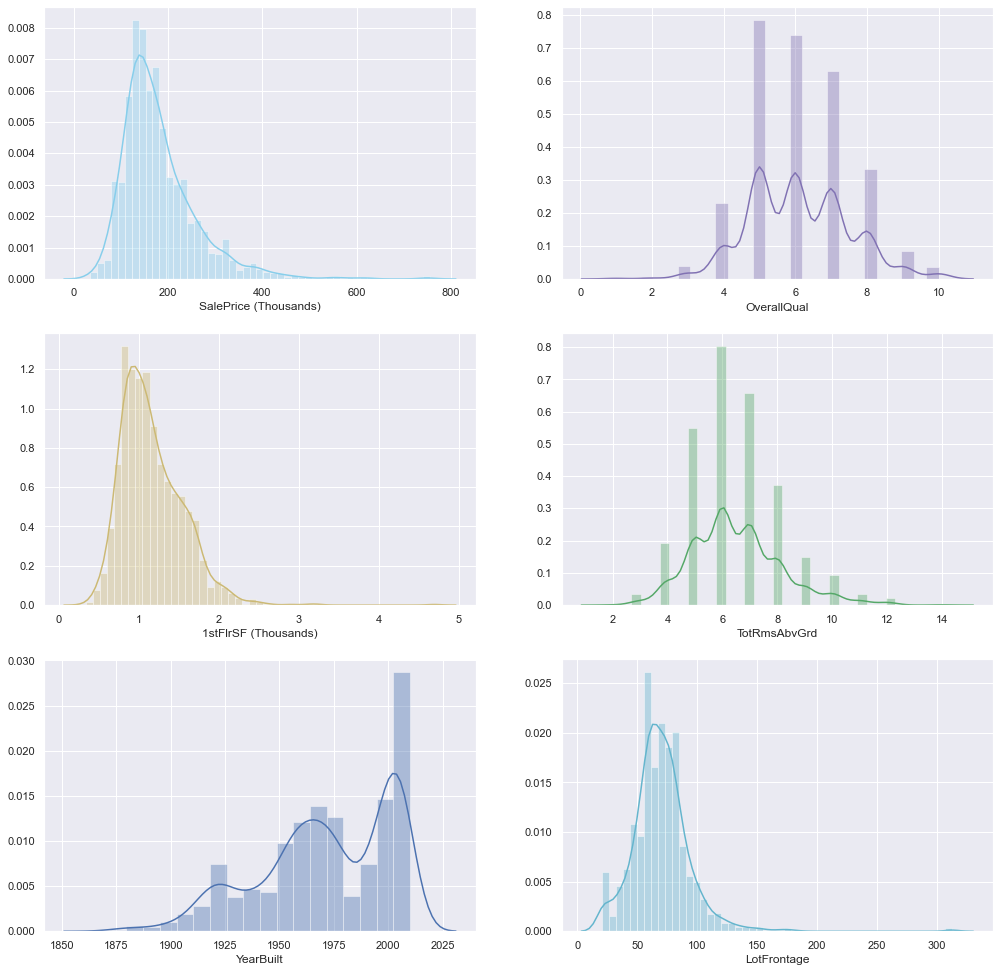

In [730]:
sns.set();

f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))
colors = ["skyblue","m","y","g","b","c"]
for i in range(0,len(variables)): 
    sns.distplot(df[variables[i]] , color=colors[i], ax=axes[i//2,i%2])
    
plt.show()

## Correlación de Variables

In [737]:
correlation = []
for i in range(1,len(variables)): #se excluye el precio ya que esta es la variable contra la que se correlaciona
    correlation.append(df[variables[0]].corr(df[variables[i]]))

corr = pd.Series(correlation, name=variables[0], index=variables[1:])
corr.to_frame().T

,OverallQual,1stFlrSF (Thousands),TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice (Thousands),0.790982,0.605852,0.533723,0.522897,0.351799


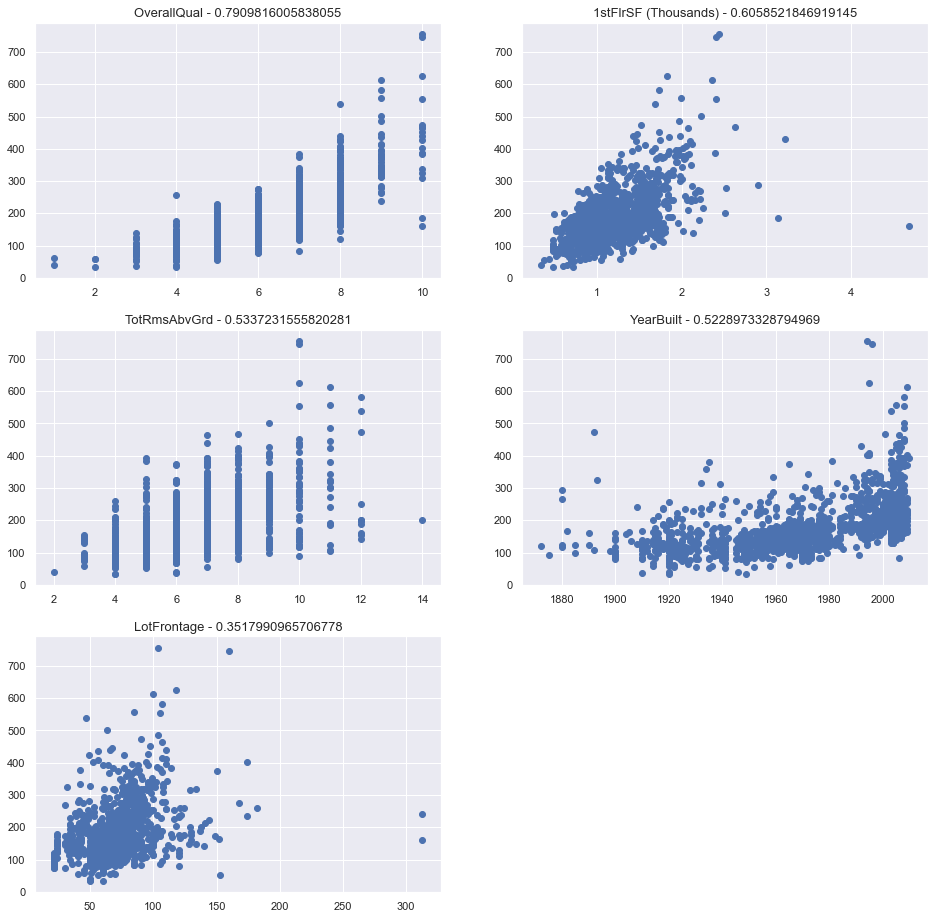

In [739]:
f,axes = plt.subplots(3,2,sharex=False, figsize=(16,16))

for i in range(1,len(variables)):
    plt.subplot(3,2,i)
    plt.scatter(df[variables[i]], df[variables[0]])
    plt.title(variables[i]+" - "+str(corr[variables[i]]), FontSize=13)

f.delaxes(axes[2,1])
plt.show()

## Elección de Variables con Potencial Predictivo

Basado en los datos calculados y la gráficas generadas, podemos concluír que las variables con más potencial predictivo son:

-  Calidad General (OverallQual)
-  Pies cuadrados en el primer piso (1stFlrSF)

## Entrenamiento del Modelo

Error: 3088.404490727138
Error: 530.4236613324232
Error: 71.4885837571349
Error: 3.7153413537758384
Error: 0.9895895940155941


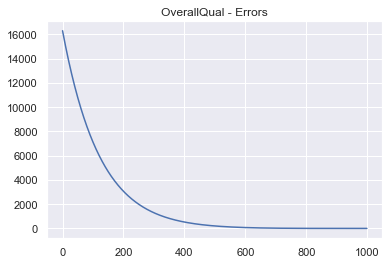

Error: 2254.285663810833
Error: 286.91790588128504
Error: 28.853363488320348
Error: 1.0106810383638025
Error: 0.3947604878615776


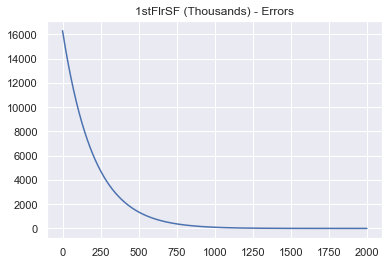

In [757]:
def train_model(x,y,epochs,print_interval,lr):
    errors = np.zeros(epochs)
    ones_v = np.ones((len(x),1))
    data = np.hstack((x,ones_v)) #matriz con x en la primer columna y 1 en la segun
    model_dict = {}
    model = np.array([0.0,0.0]) #[m,b]
    gradients = np.array([0.0,0.0])
    print_counter = 1
    for i in range(0,epochs):
        yhat = (np.matmul(data,model)).reshape(-1,1)
        errors[i] = 0.5 * ((np.average(y-yhat))**2)
        gradients = np.average((yhat-y)*data, axis=0)
        model -= (lr*gradients)
        model_dict[i] = model
        if (print_counter % print_interval) == 0:
            print("Error: "+str(errors[i]))
        
        print_counter += 1
    return model,errors
        
def plot_error(errors,title):
    plt.plot(range(0,len(errors)),errors)
    plt.title(title+" - Errors")
    plt.show()

x = train_dataset[:,1].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)


modeldict, errors = train_model(x,y,1000,200,0.0001)
plot_error(errors,variables[1])

x = train_dataset[:,2].reshape(-1,1)
modeldict, errors = train_model(x,y,2000,400,0.001)
plot_error(errors,variables[2])